In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

In [16]:
df=pd.read_csv("data/data_cleaned.csv")
df.head()

,Unnamed: 0,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,...,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,group_size,night_total
0,0,tour_0,switzerland,45-64,Friends/Relatives,1,1,Leisure and Holidays,Wildlife tourism,"Friends, relatives",...,0,0,13,0,Cash,0,Friendly People,674602.5,2,13
1,1,tour_10,united kingdom,25-44,Alone,1,0,Leisure and Holidays,Cultural tourism,others,...,0,0,14,7,Cash,1,"Wonderful Country, Landscape, Nature",3214906.5,1,21
2,2,tour_1000,united kingdom,25-44,Alone,0,1,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",...,0,0,1,31,Cash,0,Excellent Experience,3315000.0,1,32
3,3,tour_1002,united kingdom,25-44,Spouse,1,1,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",...,1,0,11,0,Cash,1,Friendly People,7790250.0,2,11
4,4,tour_1004,china,1-24,Alone,1,0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",...,0,0,7,4,Cash,1,No comments,1657500.0,1,11


In [18]:
# Convert categorical features to numerical

categorical_features = ['country', 'travel_with', 'purpose','age_group']
numeric_features = ['total_female', 'night_zanzibar','night_mainland','total_male']
boolean_features = ['first_trip_tz','package_insurance', 'tour_arrangement']

# Define preprocessing for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('bool', 'passthrough', boolean_features)])

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Split data into train and test sets
X = df[['total_female', 'night_zanzibar','night_mainland','total_male', 'country', 'travel_with', 'purpose', 'first_trip_tz',
        'package_insurance', 'tour_arrangement','age_group']]
y = df['total_cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
r2 = r2_score(y_test, y_pred)

print(f"R^2 Score: {r2}")

RMSE: 9710907.541198744
R^2 Score: 0.32249127430821123


In [19]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

param_grid = {
    'regressor__fit_intercept': [True, False]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)
print("Best parameters found:", grid_search.best_params_)
print("Best RMSE score found:", np.sqrt(-grid_search.best_score_))

# Optionally, predict with the best model and evaluate performance
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
print('R^2 Score:', r2_score(y_test, y_pred))


Best parameters found: {'regressor__fit_intercept': False}
Best RMSE score found: 9908480.788403917
RMSE: 9280549.015776405
R^2 Score: 0.38121098940288267


In [20]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['total_female',
                                                                          'night_zanzibar',
                                                                          'night_mainland',
                                                                          'total_male']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['country',
                                                                          'travel_with',
                                                                          'purpose',
                                                                          'age_group']),
                                                                        ('bool',
                                                                         'passthrough',
                                                                         ['first_trip_tz',
                                                                          'package_insurance',
                                                                          'tour_arrangement'])])),
                                       ('regressor', LinearRegression())]),
             param_grid={'regressor__fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [21]:
from sklearn.linear_model import Ridge
# Define the model
ridge_model= Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', Ridge(alpha=1.0))])

ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
print('R^2 Score:', r2_score(y_test, y_pred))

RMSE: 9687368.497105055
R^2 Score: 0.32577182846793173


## new test

In [22]:
# Convert categorical features to numerical
from sklearn.metrics import mean_squared_error, r2_score
categorical_features = ['country', 'travel_with', 'purpose','payment_mode','main_activity','age_group']
numeric_features = ['total_female', 'night_zanzibar','night_mainland','total_male']
boolean_features = ['first_trip_tz','package_insurance', 'tour_arrangement']

# Define preprocessing for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('bool', 'passthrough', boolean_features)])

# Define the model
model2 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Split data into train and test sets
X = df[['total_female', 'night_zanzibar','night_mainland','total_male', 'country', 'travel_with', 'purpose', 'first_trip_tz',
        'package_insurance', 'tour_arrangement','age_group','payment_mode','main_activity']]
y = df['total_cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model2.fit(X_train, y_train)

# Predict and evaluate
y_pred = model2.predict(X_test)
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
r2 = r2_score(y_test, y_pred)

print(f"R^2 Score: {r2}")

RMSE: 9724980.605754154
R^2 Score: 0.32052615770296633


In [23]:
model2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

param_grid = {
    'regressor__fit_intercept': [True, False]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)
print("Best parameters found:", grid_search.best_params_)
print("Best RMSE score found:", np.sqrt(-grid_search.best_score_))

# Optionally, predict with the best model and evaluate performance
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
print('R^2 Score:', r2_score(y_test, y_pred))


Best parameters found: {'regressor__fit_intercept': False}
Best RMSE score found: 9908480.788403917
RMSE: 9280549.015776405
R^2 Score: 0.38121098940288267


# StackingRegressor

In [27]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV

In [ ]:


# Define the feature columns
categorical_features = ['country', 'travel_with', 'purpose','age_group']
numeric_features = ['total_female', 'night_zanzibar','night_mainland','total_male']
boolean_features = ['first_trip_tz','package_insurance', 'tour_arrangement']

# Define preprocessing for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('bool', 'passthrough', boolean_features)])

# Define the base estimators for stacking
estimators = [
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor(random_state=42))
]

# Define the stacking regressor
stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())

# Define the pipeline with the stacking regressor
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', stacking_regressor)])

# Split data into train and test sets
X = df[numeric_features + categorical_features + boolean_features]
y = df['total_cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter tuning space
param_grid = {
    'regressor__estimators': [
        [('lr', LinearRegression()), ('dt', DecisionTreeRegressor(random_state=42))],
        [('lr', LinearRegression()), ('rf', RandomForestRegressor(random_state=42))],
        [('dt', DecisionTreeRegressor(random_state=42)), ('rf', RandomForestRegressor(random_state=42))]
    ],
    'regressor__final_estimator__n_jobs': [-1, 1, 2]
}

# Perform hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Train the best model on the entire training set
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

In [31]:
# Group by 'country' and calculate the sum of 'total_cost'
country_costs = df.groupby('country')['total_cost'].sum().reset_index()

# Sort the results by 'total_cost' in descending order
country_costs_sorted = country_costs.sort_values(by='total_cost', ascending=False)

# Print the top countries by total cost
print(country_costs_sorted)

                     country    total_cost
98  united states of america  8.805902e+09
97            united kingdom  3.843275e+09
41                     italy  3.635050e+09
29                    france  3.339549e+09
3                  australia  2.743132e+09
..                       ...           ...
61                   myanmar  3.315000e+05
6                    bermuda  2.000000e+05
52                madagascar  1.945500e+05
99                   uruguay  1.657500e+05
49                   lesotho  1.600000e+05

[103 rows x 2 columns]


In [32]:
df.country.nunique()

103

In [33]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Calculate total cost per country
country_costs = df.groupby('country')['total_cost'].sum().reset_index()

# Step 2: Standardize the spending data
scaler = StandardScaler()
country_costs['total_cost_scaled'] = scaler.fit_transform(country_costs[['total_cost']])

# Step 3: Use K-means clustering to group countries
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
country_costs['cluster'] = kmeans.fit_predict(country_costs[['total_cost_scaled']])

# Step 4: Map countries to their clusters
country_cluster_map = country_costs.set_index('country')['cluster'].to_dict()
df['country_cluster'] = df['country'].map(country_cluster_map)

# Step 5: Convert cluster labels to categorical feature
df['country_cluster'] = df['country_cluster'].astype('category')


C:\Users\Mohammadreza\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [34]:
df['country_cluster']

0       4
1       1
2       1
3       1
4       0
       ..
4767    0
4768    2
4769    4
4770    3
4771    1
Name: country_cluster, Length: 4772, dtype: category
Categories (5, int64): [0, 1, 2, 3, 4]

# testing model 3 with clustring countries


In [112]:
# Convert categorical features to numerical
from sklearn.metrics import mean_squared_error, r2_score
categorical_features = ['country', 'travel_with', 'purpose','age_group']
numeric_features = ['total_female', 'night_zanzibar','night_mainland','total_male',]
boolean_features = ['first_trip_tz','package_insurance', 'tour_arrangement']

# Define preprocessing for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('bool', 'passthrough', boolean_features)])

# Define the model
model3 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Split data into train and test sets
X = df[['total_female', 'night_zanzibar','night_mainland','total_male', 'country', 'travel_with', 'purpose', 'first_trip_tz',
        'package_insurance', 'tour_arrangement','age_group']]
y = df['total_cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model3.fit(X_train, y_train)

# Predict and evaluate
y_pred = model3.predict(X_test)
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
r2 = r2_score(y_test, y_pred)

print(f"R^2 Score: {r2}")

RMSE: 9710907.541198744
R^2 Score: 0.32249127430821123


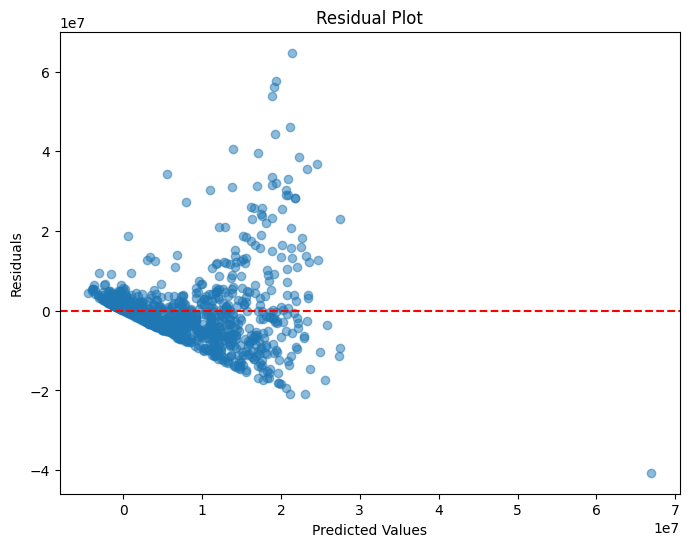

In [116]:
y_true = y_test  # Actual values from the test set
y_pred = best_model.predict(X_test)  # Predicted values from your model

# Calculate residuals
residuals = y_true - y_pred

# Plotting residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [114]:
model3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

param_grid = {
    'regressor__fit_intercept': [True, False]
}
grid_search = GridSearchCV(model3, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)
print("Best parameters found:", grid_search.best_params_)
print("Best RMSE score found:", np.sqrt(-grid_search.best_score_))

# Optionally, predict with the best model and evaluate performance
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
print('R^2 Score:', r2_score(y_test, y_pred))


Best parameters found: {'regressor__fit_intercept': False}
Best RMSE score found: 9908480.788403917
RMSE: 9280549.015776405
R^2 Score: 0.38121098940288267


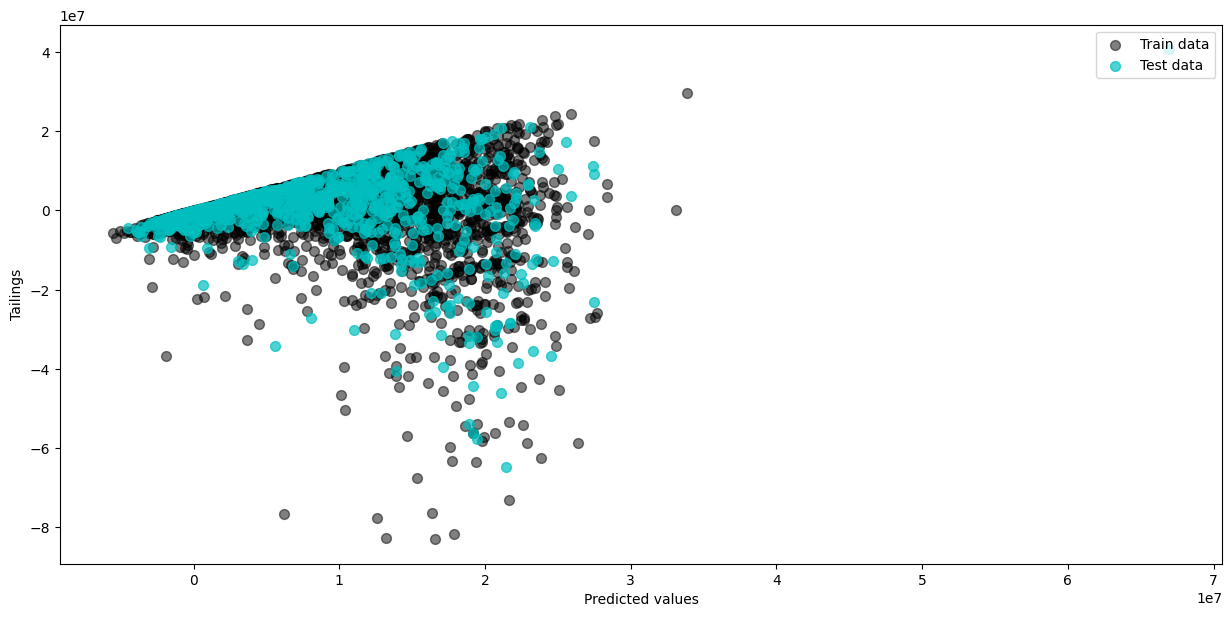

In [117]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

plt.figure(figsize=(15,7))

plt.scatter(y_train_pred,y_train_pred - y_train,
          c = 'black', marker = 'o', s = 50, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred,y_test_pred - y_test,
          c = 'c', marker = 'o', s = 50, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper right')
plt.show()

# checking outliers

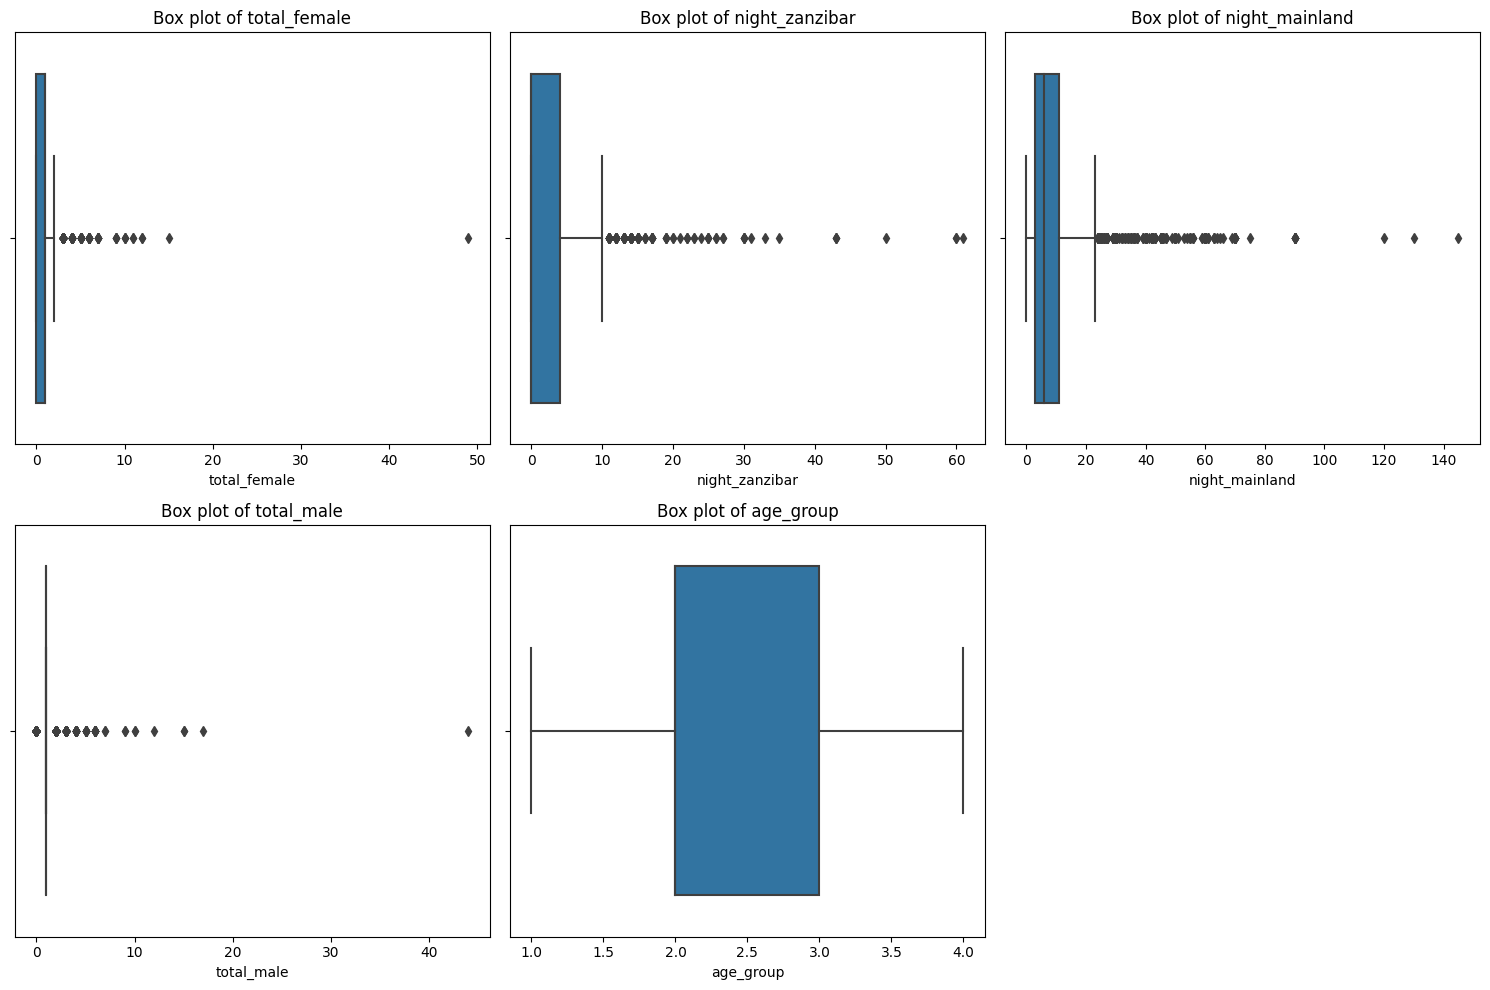

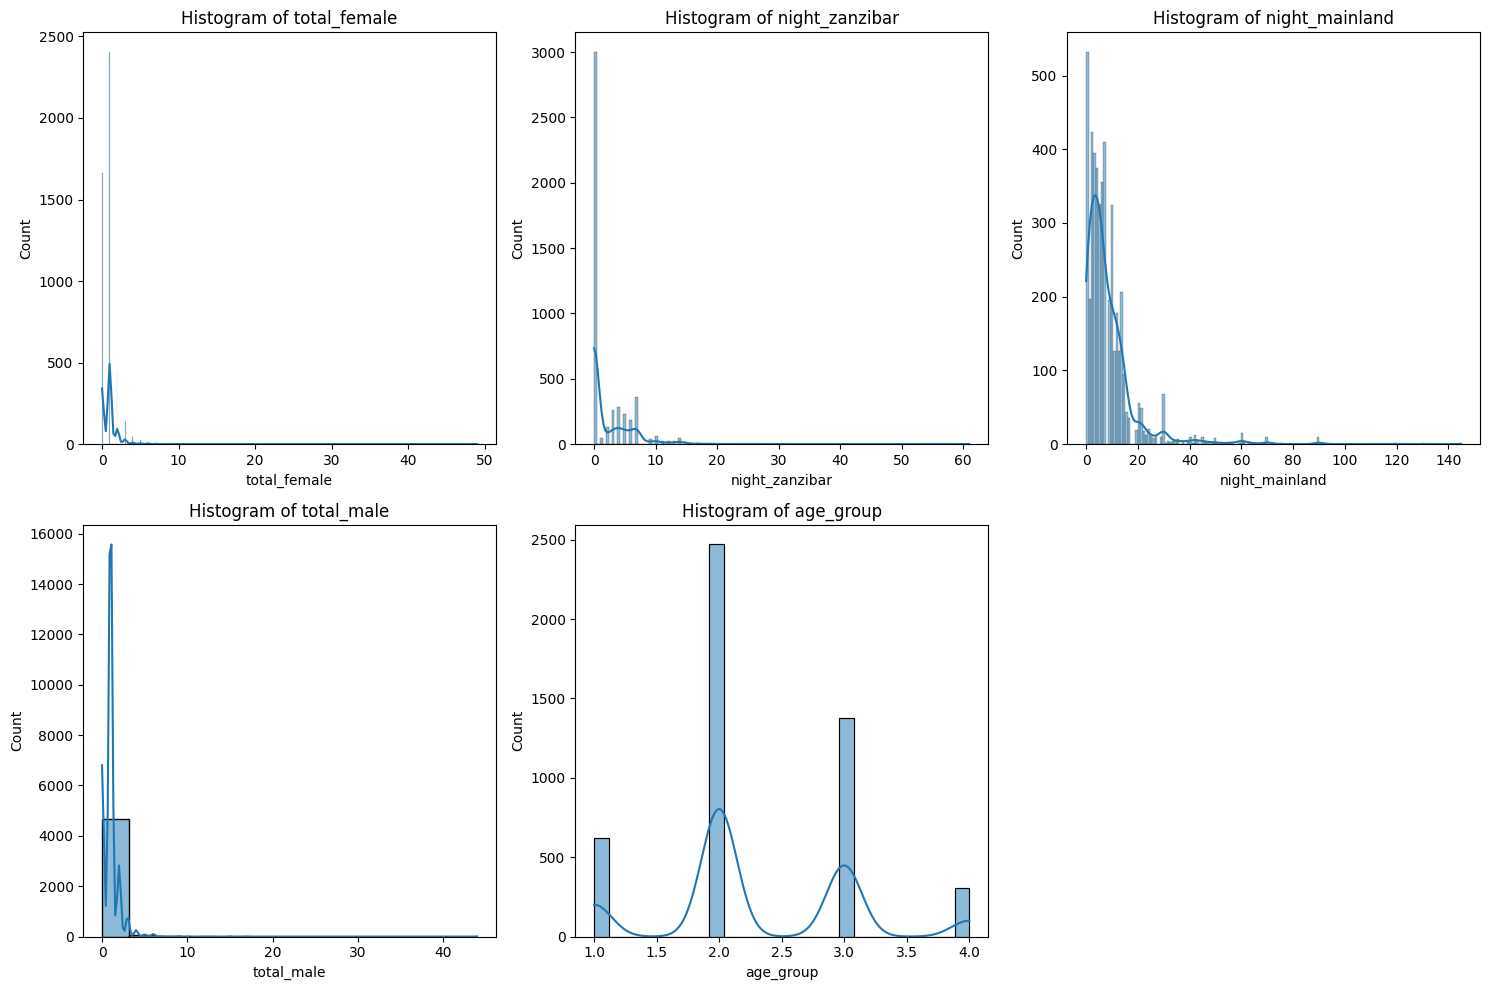

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your dataframe

# Select numerical columns
numerical_cols = ['total_female', 'night_zanzibar', 'night_mainland', 'total_male', 'age_group']

# Box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

# Histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


In [139]:
df.total_male.unique()

array([ 1,  0,  2,  3,  4,  5,  6, 15, 17,  7, 10, 12, 44,  9],
      dtype=int64)

In [140]:
df.total_female.unique()

array([ 1,  0,  2,  4,  3,  5, 12, 10,  6, 11,  7, 15,  9, 49],
      dtype=int64)

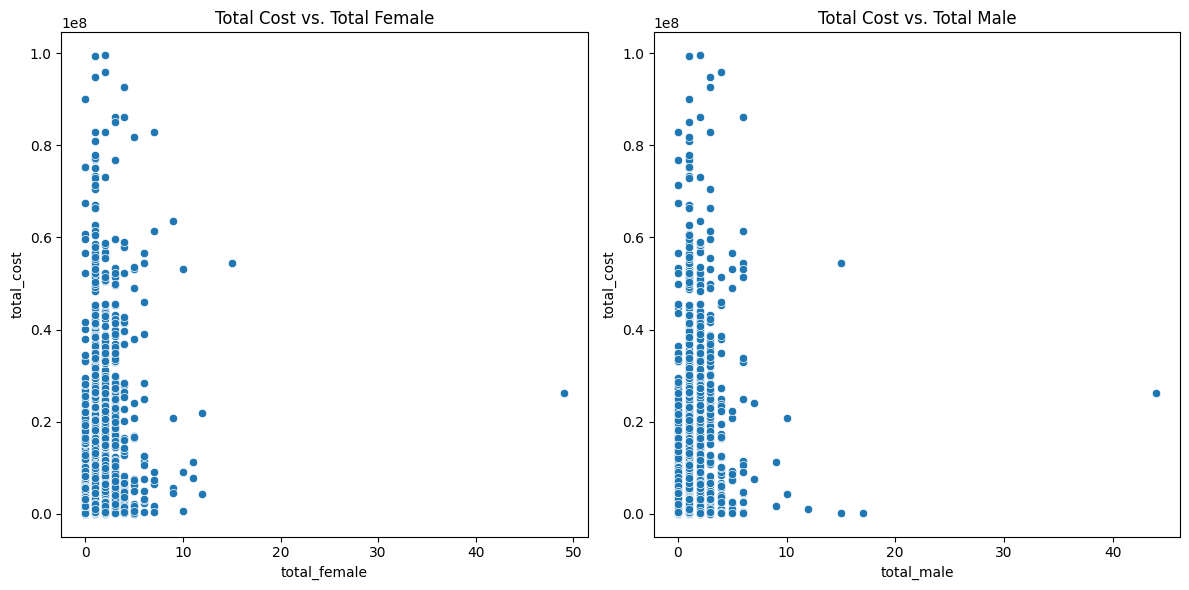

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plots to visualize relationship between total_cost and total_male/total_female
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=df['total_female'], y=df['total_cost'])
plt.title('Total Cost vs. Total Female')

plt.subplot(1, 2, 2)
sns.scatterplot(x=df['total_male'], y=df['total_cost'])
plt.title('Total Cost vs. Total Male')

plt.tight_layout()
plt.show()


In [35]:
df_copy = df.copy()
# Calculate the 95th percentile for total_male and total_female
cap_value_male = df_copy['total_male'].quantile(0.99)
cap_value_female = df_copy['total_female'].quantile(0.99)

# Cap the values
df_copy['total_male'] = df_copy['total_male'].apply(lambda x: min(x, cap_value_male))
df_copy['total_female'] = df_copy['total_female'].apply(lambda x: min(x, cap_value_female))

# Verify the changes
print(f'After capping:\n{df_copy[["total_male", "total_female"]].describe()}')


After capping:
        total_male  total_female
count  4772.000000   4772.000000
mean      0.971710      0.885583
std       0.780873      0.913524
min       0.000000      0.000000
25%       1.000000      0.000000
50%       1.000000      1.000000
75%       1.000000      1.000000
max       4.000000      5.000000


In [36]:
print(f'before capping:\n{df[["total_male", "total_female"]].describe()}')

before capping:
        total_male  total_female
count  4772.000000   4772.000000
mean      1.005029      0.915339
std       1.136638      1.256949
min       0.000000      0.000000
25%       1.000000      0.000000
50%       1.000000      1.000000
75%       1.000000      1.000000
max      44.000000     49.000000


In [150]:

# Define the model
model4 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Split data into train and test sets
X = df_copy[['total_female', 'night_zanzibar','night_mainland','total_male', 'country', 'travel_with', 'purpose', 'first_trip_tz',
        'package_insurance', 'tour_arrangement','age_group']]
y = df_copy['total_cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model4.fit(X_train, y_train)

# Predict and evaluate
y_pred = model4.predict(X_test)
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
r2 = r2_score(y_test, y_pred)

print(f"R^2 Score: {r2}")

RMSE: 9281041.706462553
R^2 Score: 0.38114528646348


In [151]:
model4 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

param_grid = {
    'regressor__fit_intercept': [True, False]
}
grid_search = GridSearchCV(model4, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)
print("Best parameters found:", grid_search.best_params_)
print("Best RMSE score found:", np.sqrt(-grid_search.best_score_))

# Optionally, predict with the best model and evaluate performance
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
print('R^2 Score:', r2_score(y_test, y_pred))


Best parameters found: {'regressor__fit_intercept': False}
Best RMSE score found: 9755372.753188604
RMSE: 9111391.757351203
R^2 Score: 0.40356283826031214


In [152]:
# Define the pipeline with the stacking regressor
model4 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', stacking_regressor)])

# Split data into train and test sets
X = df_copy[numeric_features + categorical_features + boolean_features]
y = df_copy['total_cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter tuning space
param_grid = {
    'regressor__estimators': [
        [('lr', LinearRegression()), ('dt', DecisionTreeRegressor(random_state=42))],
        [('lr', LinearRegression()), ('rf', RandomForestRegressor(random_state=42))],
        [('dt', DecisionTreeRegressor(random_state=42)), ('rf', RandomForestRegressor(random_state=42))]
    ],
    'regressor__final_estimator__n_jobs': [-1, 1, 2]
}

# Perform hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(model4, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Train the best model on the entire training set
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Best Parameters:  {'regressor__estimators': [('lr', LinearRegression()), ('rf', RandomForestRegressor(random_state=42))], 'regressor__final_estimator__n_jobs': -1}
Best Score:  -92988672888527.47
RMSE: 8799579.61
R^2 Score: 0.44


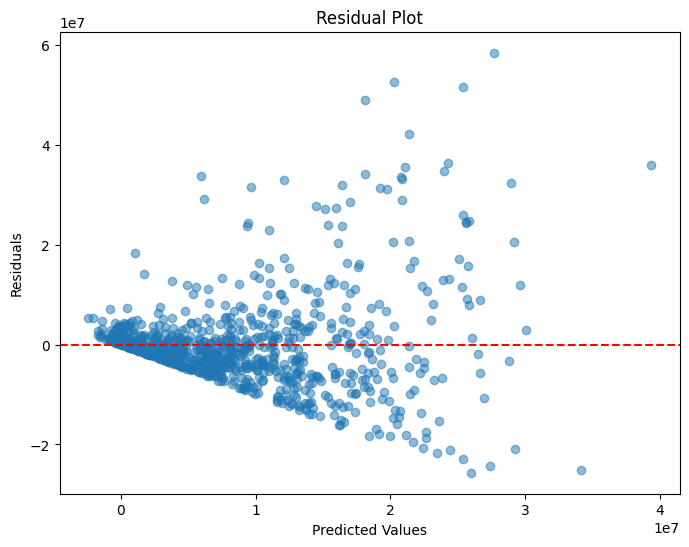

In [158]:

y_true = y_test  # Actual values from the test set
y_pred = best_model.predict(X_test)  # Predicted values from your model

# Calculate residuals
residuals = y_true - y_pred

# Plotting residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


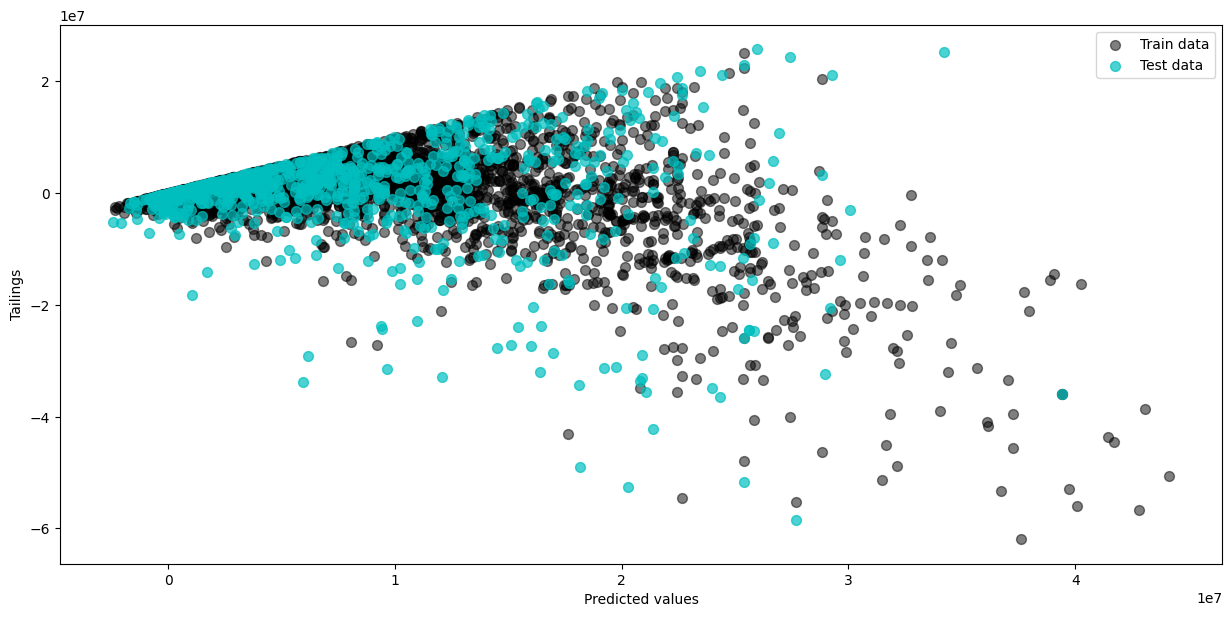

In [163]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

plt.figure(figsize=(15,7))

plt.scatter(y_train_pred,y_train_pred - y_train,
          c = 'black', marker = 'o', s = 50, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred,y_test_pred - y_test,
          c = 'c', marker = 'o', s = 50, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper right')
plt.show()

# another model


In [40]:
# Convert categorical features to numerical
from sklearn.metrics import mean_squared_error, r2_score
categorical_features = ['country', 'travel_with', 'purpose','age_group']
numeric_features = ['total_female', 'night_zanzibar','night_mainland','total_male']
boolean_features = ['first_trip_tz','package_insurance', 'tour_arrangement','package_accomodation','package_transport_int']

# Define preprocessing for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('bool', 'passthrough', boolean_features)])

# Define the model
model5 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Split data into train and test sets
X = df_copy[['total_female', 'night_zanzibar','night_mainland','total_male', 'country', 'travel_with', 'purpose', 'first_trip_tz',
        'package_insurance', 'tour_arrangement','age_group','package_accomodation','package_transport_int']]
y = df_copy['total_cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model5.fit(X_train, y_train)

# Predict and evaluate
y_pred = model5.predict(X_test)
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
r2 = r2_score(y_test, y_pred)

print(f"R^2 Score: {r2}")

RMSE: 9161223.318144158
R^2 Score: 0.3970209902421753


In [41]:
# Define the pipeline with the stacking regressor
model5 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', stacking_regressor)])

# Split data into train and test sets
X = df_copy[numeric_features + categorical_features + boolean_features]
y = df_copy['total_cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter tuning space
param_grid = {
    'regressor__estimators': [
        [('lr', LinearRegression()), ('dt', DecisionTreeRegressor(random_state=42))],
        [('lr', LinearRegression()), ('rf', RandomForestRegressor(random_state=42))],
        [('dt', DecisionTreeRegressor(random_state=42)), ('rf', RandomForestRegressor(random_state=42))]
    ],
    'regressor__final_estimator__n_jobs': [-1, 1, 2]
}

# Perform hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(model5, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Train the best model on the entire training set
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Best Parameters:  {'regressor__estimators': [('lr', LinearRegression()), ('rf', RandomForestRegressor(random_state=42))], 'regressor__final_estimator__n_jobs': -1}
Best Score:  -90961896213869.86
RMSE: 8724267.22
R^2 Score: 0.45


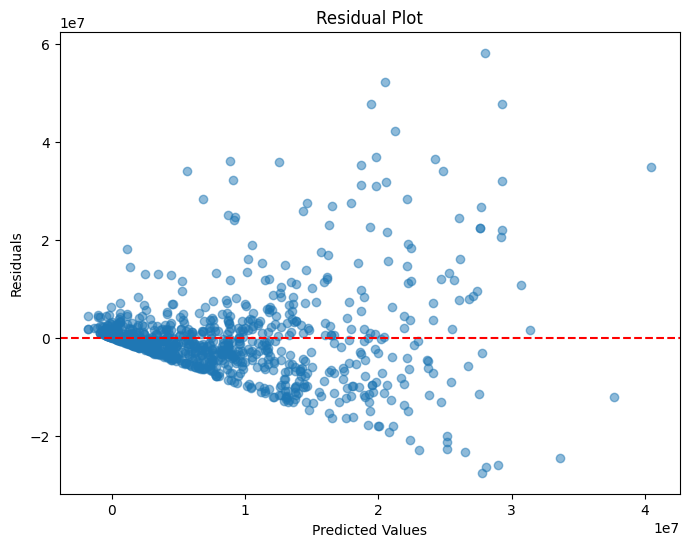

In [43]:



y_true = y_test  # Actual values from the test set
y_pred = best_model.predict(X_test)  # Predicted values from your model

# Calculate residuals
residuals = y_true - y_pred

# Plotting residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


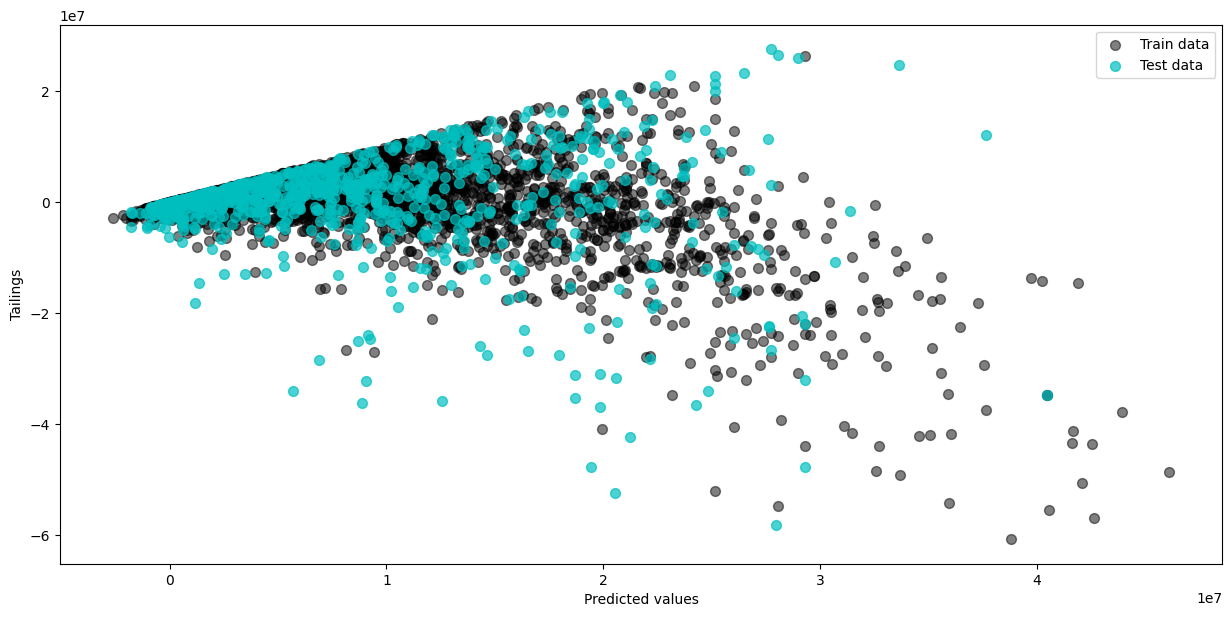

In [44]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

plt.figure(figsize=(15,7))

plt.scatter(y_train_pred,y_train_pred - y_train,
          c = 'black', marker = 'o', s = 50, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred,y_test_pred - y_test,
          c = 'c', marker = 'o', s = 50, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper right')
plt.show()

# WITH CLEANING OF TOTAL NIGHTS OUTLIERS

In [46]:
print(f'After capping:\n{df_copy[["night_zanzibar", "night_mainland"]].describe()}')

After capping:
       night_zanzibar  night_mainland
count     4772.000000     4772.000000
mean         2.303856        8.487008
std          4.234120       10.445597
min          0.000000        0.000000
25%          0.000000        3.000000
50%          0.000000        6.000000
75%          4.000000       11.000000
max         61.000000      145.000000


In [87]:
df_copy2 = df_copy.copy()

cap_value_male = df_copy['night_zanzibar'].quantile(0.92)
cap_value_female = df_copy['night_mainland'].quantile(0.92)

# Cap the values
df_copy2['night_zanzibar'] = df_copy2['night_zanzibar'].apply(lambda x: min(x, cap_value_male))
df_copy2['night_mainland'] = df_copy2['night_mainland'].apply(lambda x: min(x, cap_value_female))

# Verify the changes
print(f'After capping:\n{df_copy2[["night_zanzibar", "night_mainland"]].describe()}')


After capping:
       night_zanzibar  night_mainland
count     4772.000000     4772.000000
mean         1.877200        7.262573
std          2.688543        5.868359
min          0.000000        0.000000
25%          0.000000        3.000000
50%          0.000000        6.000000
75%          4.000000       11.000000
max          7.000000       20.000000


In [101]:

# Calculate the 95th percentile for total_male and total_female
cap_value_male = df_copy['total_cost'].quantile(0.80)


# Cap the values
df_copy2['total_cost'] = df_copy2['total_cost'].apply(lambda x: min(x, cap_value_male))


# Verify the changes
print(f'After capping:\n{df_copy2["total_cost"].describe()}')

After capping:
count    4.772000e+03
mean     5.089871e+06
std      4.602675e+06
min      2.486250e+05
25%      7.942655e+05
50%      3.349808e+06
75%      9.905269e+06
max      1.220058e+07
Name: total_cost, dtype: float64


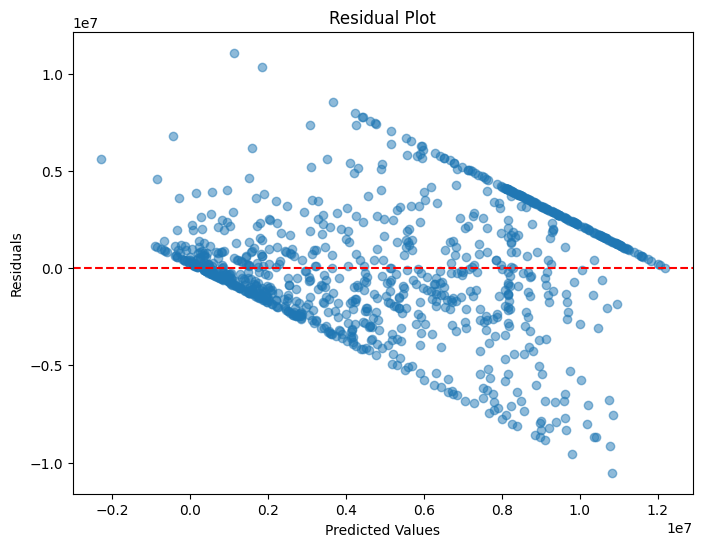

In [109]:


y_true = y_test  # Actual values from the test set
y_pred = model6.predict(X_test)  # Predicted values from your model

# Calculate residuals
residuals = y_true - y_pred

# Plotting residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

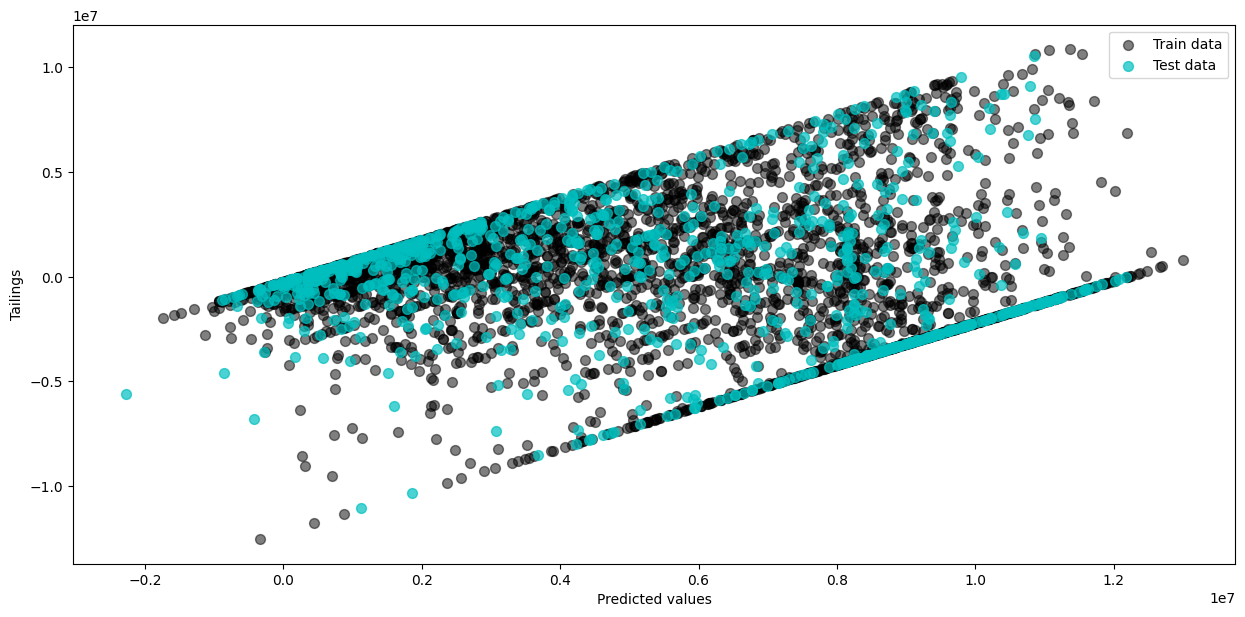

In [108]:
y_train_pred = model6.predict(X_train)
y_test_pred = model6.predict(X_test)

plt.figure(figsize=(15,7))

plt.scatter(y_train_pred,y_train_pred - y_train,
          c = 'black', marker = 'o', s = 50, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred,y_test_pred - y_test,
          c = 'c', marker = 'o', s = 50, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper right')
plt.show()

In [107]:
# Convert categorical features to numerical
from sklearn.metrics import mean_squared_error, r2_score
categorical_features = ['country', 'travel_with', 'purpose','age_group']
numeric_features = ['total_female', 'night_zanzibar','night_mainland','total_male']
boolean_features = ['first_trip_tz','package_insurance', 'tour_arrangement','package_accomodation','package_transport_int']

# Define preprocessing for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('bool', 'passthrough', boolean_features)])

# Define the model
model6 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Split data into train and test sets
X = df_copy2[['total_female', 'night_zanzibar','night_mainland','total_male', 'country', 'travel_with', 'purpose', 'first_trip_tz',
        'package_insurance', 'tour_arrangement','age_group','package_accomodation','package_transport_int']]
y = df_copy2['total_cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model6.fit(X_train, y_train)

# Predict and evaluate
y_pred = model6.predict(X_test)
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
r2 = r2_score(y_test, y_pred)

print(f"R^2 Score: {r2}")

RMSE: 3052494.4652899373
R^2 Score: 0.5560786265348114


In [104]:
# Define the pipeline with the stacking regressor
model6 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', stacking_regressor)])

# Split data into train and test sets
X = df_copy2[numeric_features + categorical_features + boolean_features]
y = df_copy2['total_cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter tuning space
param_grid = {
    'regressor__estimators': [
        [('lr', LinearRegression()), ('dt', DecisionTreeRegressor(random_state=42))],
        [('lr', LinearRegression()), ('rf', RandomForestRegressor(random_state=42))],
        [('dt', DecisionTreeRegressor(random_state=42)), ('rf', RandomForestRegressor(random_state=42))]
    ],
    'regressor__final_estimator__n_jobs': [-1, 1, 2]
}

# Perform hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(model6, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Train the best model on the entire training set
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Best Parameters:  {'regressor__estimators': [('lr', LinearRegression()), ('rf', RandomForestRegressor(random_state=42))], 'regressor__final_estimator__n_jobs': -1}
Best Score:  -9239500913510.822
RMSE: 3027186.40
R^2 Score: 0.56


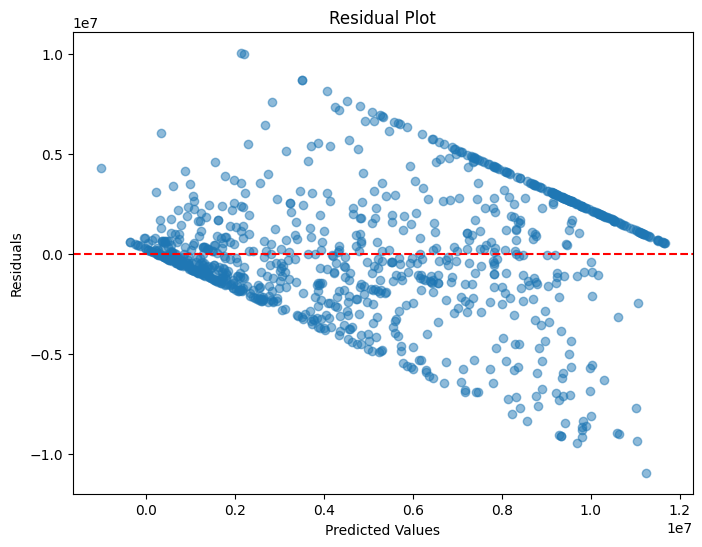

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns


y_true = y_test  # Actual values from the test set
y_pred = best_model.predict(X_test)  # Predicted values from your model

# Calculate residuals
residuals = y_true - y_pred

# Plotting residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


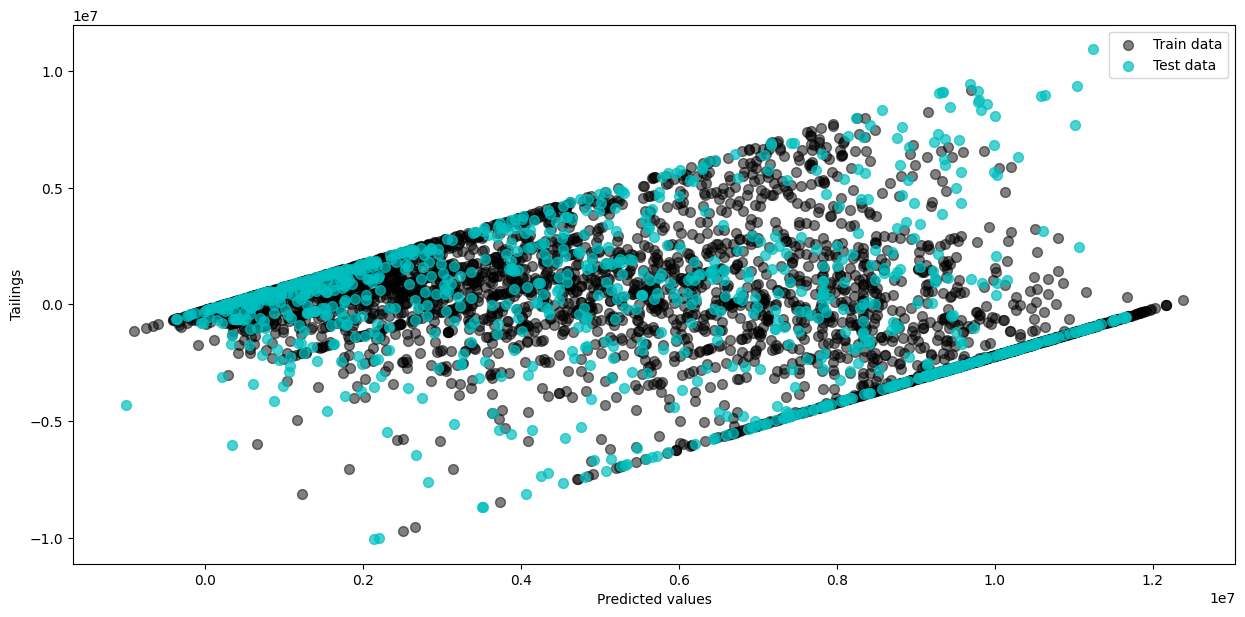

In [106]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

plt.figure(figsize=(15,7))

plt.scatter(y_train_pred,y_train_pred - y_train,
          c = 'black', marker = 'o', s = 50, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred,y_test_pred - y_test,
          c = 'c', marker = 'o', s = 50, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper right')
plt.show()